NBA Player of the Week
======




## National Basketball Association Player of the week data from 1984-1985 to current season 2018-2019



### Questions for Audience

* #### Do you know of the NBA?
* #### Have you watched or are you watching any NBA games?
* #### Do you about the format of a NBA season? (How many teams, regular season, playoff, conference)
* #### If yes, who is your favorite basketball player of all time? Or who is the one player you've heard of (Other than Michael Jordan)?
* #### Any idea what position he plays? ( PG - SG - SM - PF - C )
* #### Which is your favorite team in the NBA?



### Libraries importing


In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [77]:
df = pd.read_csv('./NBA_player_of_the_week.csv')

### Quick look at our data

In [78]:
df.head()

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value
0,0,Micheal Ray Richardson,New Jersey Nets,NaN,"Apr 14, 1985",PG,6-5,189,29,1978,6,1984-1985,1985,1.0
1,0,Derek Smith,Los Angeles Clippers,NaN,"Apr 7, 1985",SG,6-6,205,23,1982,2,1984-1985,1985,1.0
2,0,Calvin Natt,Denver Nuggets,NaN,"Apr 1, 1985",F,6-6,220,28,1979,5,1984-1985,1985,1.0
3,0,Kareem Abdul-Jabbar,Los Angeles Lakers,NaN,"Mar 24, 1985",C,7-2,225,37,1969,15,1984-1985,1985,1.0
4,0,Larry Bird,Boston Celtics,NaN,"Mar 17, 1985",SF,6-9,220,28,1978,5,1984-1985,1985,1.0


In [79]:
df.tail()

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value
1150,1,Russell Westbrook,Oklahoma City Thunder,West,"Nov 5, 2018",G,6-3,200,30,2008,10,2018-2019,2019,0.5
1151,1,Giannis Antetokounmpo,Milwaukee Bucks,East,"Oct 29, 2018",F,6-11,242,24,2013,5,2018-2019,2019,0.5
1152,1,Stephen Curry,Golden State Warriors,West,"Oct 29, 2018",G,6-3,190,30,2009,9,2018-2019,2019,0.5
1153,1,Kemba Walker,Charlotte Hornets,East,"Oct 22, 2018",G,6-1,184,28,2011,7,2018-2019,2019,0.5
1154,1,Nikola Jokic,Denver Nuggets,West,"Oct 22, 2018",C,7-0,250,24,2014,3,2018-2019,2019,0.5


In [80]:
df.describe()

,Active season,Weight,Age,Draft Year,Seasons in league,Season short,Real_value
count,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000
mean,0.008658,226.038095,26.772294,1997.372294,5.870130,2004.339394,0.666234
std,0.092685,31.590100,3.393478,9.442516,3.265082,9.485598,0.235651
min,0.000000,150.000000,19.000000,1969.000000,0.000000,1985.000000,0.500000
25%,0.000000,205.000000,24.000000,1991.000000,3.000000,1997.000000,0.500000
50%,0.000000,225.000000,26.000000,1998.000000,6.000000,2006.000000,0.500000
75%,0.000000,250.000000,29.000000,2004.000000,8.000000,2012.000000,1.000000
max,1.000000,325.000000,40.000000,2016.000000,17.000000,2019.000000,1.000000


#### How many players won the award

In [81]:
df['Player'].nunique()

276

#### How many teams total

In [82]:
df['Team'].nunique()

35

#### Convert Date

In [83]:
df['Date'] = df['Date'].str.replace(', ', '-')
for k,v in enumerate(calendar.month_abbr): #the calendar module is useful to translate months as string to months as integers
    if(k!=0): #the first row is empty
        df['Date'] = df['Date'].str.replace(v + ' ', str(k)+'-')

df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%Y')

In [84]:
df['Date'].head()

0   1985-04-14
1   1985-04-07
2   1985-04-01
3   1985-03-24
4   1985-03-17
Name: Date, dtype: datetime64[ns]

### Data Visualization (Plots)
### What to include (Questions to our data)



* #### Players who wins the most POTW 

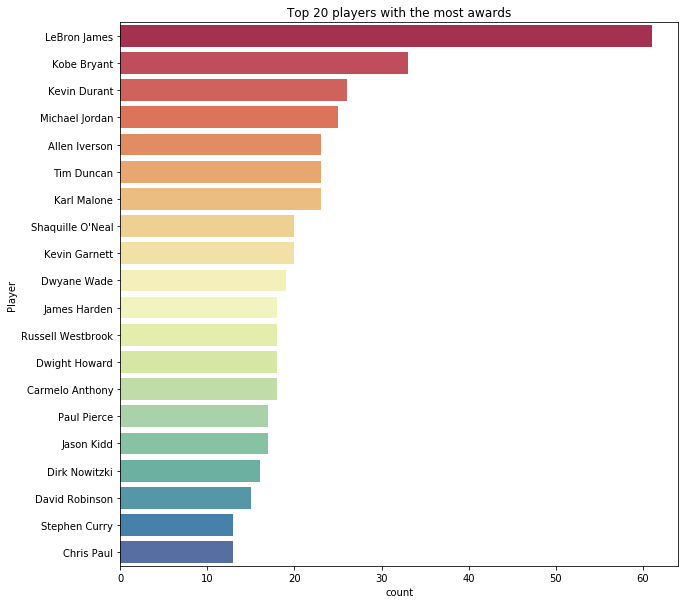

In [85]:
plt.figure(figsize=(10,10))
sns.countplot(y='Player',data=df,palette='Spectral' ,order=df.Player.value_counts().head(20).index)
plt.title('Top 20 players with the most awards')
plt.show()

* #### How many teams did player Lebron James win the award with


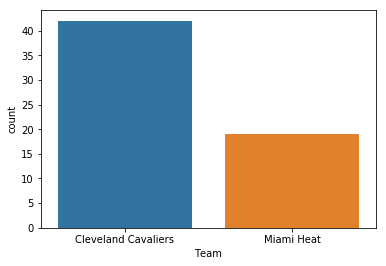

In [86]:
dft = df[df.Player=='LeBron James']
sns.countplot(x='Team',data=dft)
plt.show()


* #### His most dominant seasons



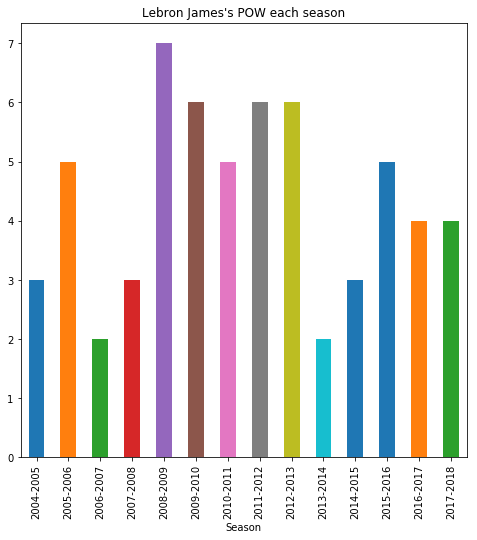

In [88]:
plt.figure(figsize=(8,8))
dft.groupby(['Season'])['Season'].count().plot(kind='bar')
plt.title("""Lebron James's POW each season""")
plt.show()

* #### Teams with most awards

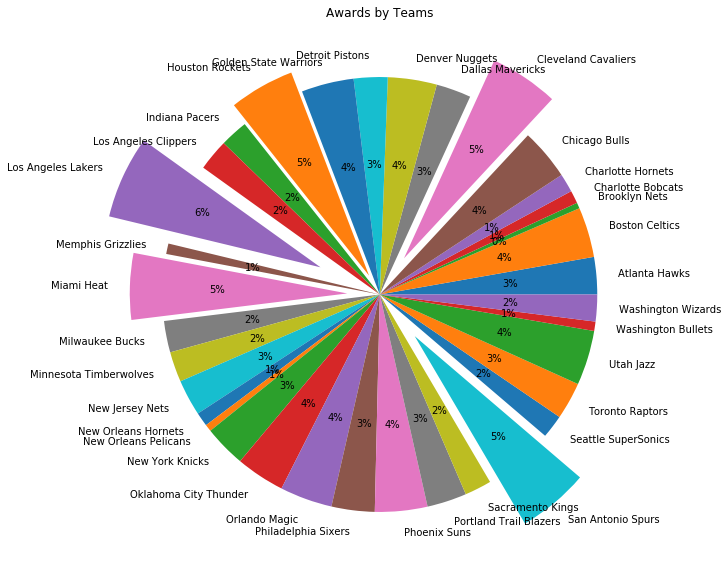

In [13]:
explode = [0] * 35
explode[14] = 0.3
explode[29] = 0.25
explode[6] = 0.2
explode[16] = 0.15
explode[11] = 0.1
player_by_team = df['Player'].groupby(df['Team'])
player_by_team.count().plot.pie(title="Awards by Teams",explode=explode, figsize=(10,10),autopct='%1.0f%%')
plt.ylabel('')
plt.show()

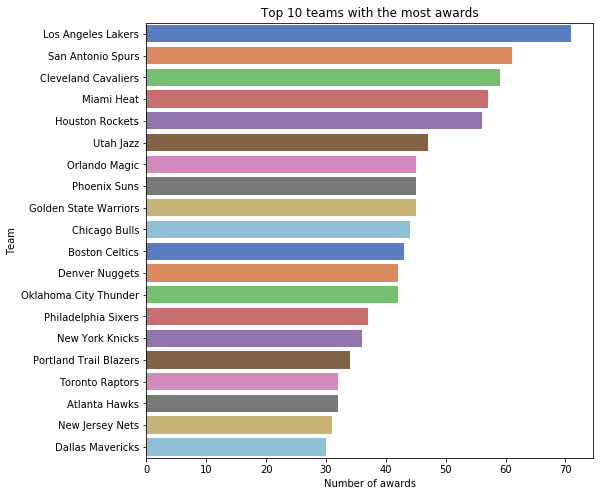

In [14]:
plotdata = df['Team'].value_counts().head(10)
plt.figure(figsize=(8,8))
sns.countplot(y='Team',data=df,palette=sns.color_palette("muted")  ,order=df.Team.value_counts().head(20).index)
plt.title('Top 10 teams with the most awards')
plt.xlabel('Number of awards')
plt.show()


* #### Who are the players who won for the Lakers

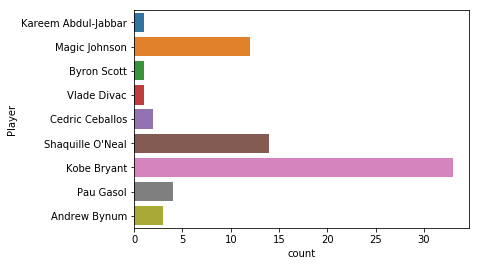

In [92]:
dft = df[df.Team=='Los Angeles Lakers']
sns.countplot(y='Player', data=dft)
plt.show()


* #### Which conference won more awards

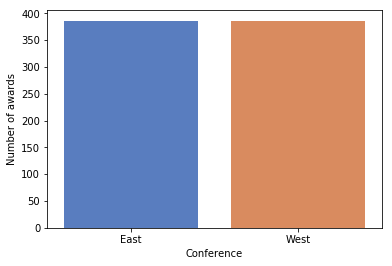

East    386
West    385
Name: Conference, dtype: int64

In [16]:
sns.countplot(x='Conference', data=df,palette=sns.color_palette("muted"), order=df.Conference.value_counts().index)
plt.ylabel('Number of awards')
plt.show()
df.Conference.value_counts()

* #### Player positions and number of awards

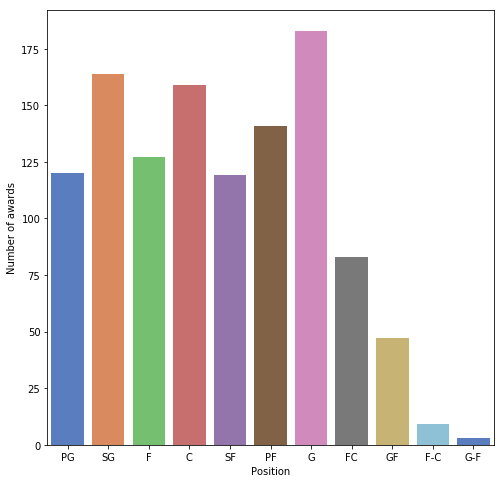

G      183
SG     164
C      159
PF     141
F      127
PG     120
SF     119
FC      83
GF      47
F-C      9
G-F      3
Name: Position, dtype: int64

In [17]:
plt.figure(figsize=(8,8))
sns.countplot(x='Position', data=df,palette=sns.color_palette("muted"))

plt.ylabel('Number of awards')
plt.show()
df.Position.value_counts()

* #### Correlation of Height and number of awards

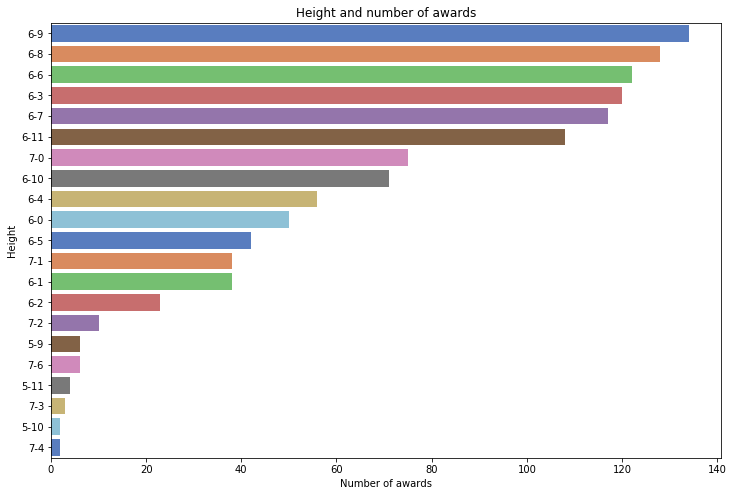

6-9    134
6-8    128
6-6    122
6-3    120
6-7    117
Name: Height, dtype: int64

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(y='Height', data=df,palette=sns.color_palette("muted"),order=df.Height.value_counts().index)
plt.xlabel('Number of awards')
plt.title('Height and number of awards')
plt.show()
df.Height.value_counts().head()

* #### Age of Winners

/Users/longnguyen/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


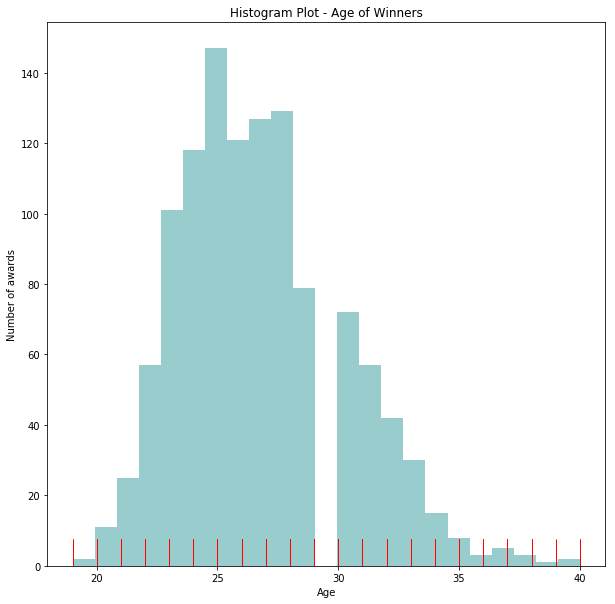

In [19]:
# sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
sns.distplot(df['Age'],kde=False, rug=True,color='teal', rug_kws={"color": "R"})
plt.title('Histogram Plot - Age of Winners')
plt.ylabel('Number of awards')
plt.show()

* #### Oldest and youngest players to win POW

In [20]:
df[df['Age']==df['Age'].max()]

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value
440,0,Michael Jordan,Washington Wizards,East,2003-03-02,SG,6-6,215,40,1984,14,2002-2003,2003,0.5
455,0,Michael Jordan,Washington Wizards,East,2003-01-05,SG,6-6,215,40,1984,14,2002-2003,2003,0.5


In [21]:
df[df['Age']==df['Age'].min()]

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value
476,0,Carmelo Anthony,Denver Nuggets,West,2004-04-12,F,6-8,240,19,2003,0,2003-2004,2004,0.5
484,0,Carmelo Anthony,Denver Nuggets,West,2004-03-14,F,6-8,240,19,2003,0,2003-2004,2004,0.5


* #### Correlation Matrix

In [22]:
# Convert height into numbers
df['Height'].value_counts()

6-9     134
6-8     128
6-6     122
6-3     120
6-7     117
6-11    108
7-0      75
6-10     71
6-4      56
6-0      50
6-5      42
7-1      38
6-1      38
6-2      23
7-2      10
5-9       6
7-6       6
5-11      4
7-3       3
5-10      2
7-4       2
Name: Height, dtype: int64

In [23]:
def convert_Height(item):
    a=int(item.split('-')[0])
    b=int(item.split('-')[1])
    h=a*30.48+b*2.54
    return h
df['Height']=df['Height'].apply(lambda x: convert_Height(x))


In [24]:
df['Height'].head()

0    195.58
1    198.12
2    198.12
3    218.44
4    205.74
Name: Height, dtype: float64

In [25]:
df.head()

,Active season,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Real_value
0,0,Micheal Ray Richardson,New Jersey Nets,NaN,1985-04-14,PG,195.58,189,29,1978,6,1984-1985,1985,1.0
1,0,Derek Smith,Los Angeles Clippers,NaN,1985-04-07,SG,198.12,205,23,1982,2,1984-1985,1985,1.0
2,0,Calvin Natt,Denver Nuggets,NaN,1985-04-01,F,198.12,220,28,1979,5,1984-1985,1985,1.0
3,0,Kareem Abdul-Jabbar,Los Angeles Lakers,NaN,1985-03-24,C,218.44,225,37,1969,15,1984-1985,1985,1.0
4,0,Larry Bird,Boston Celtics,NaN,1985-03-17,SF,205.74,220,28,1978,5,1984-1985,1985,1.0


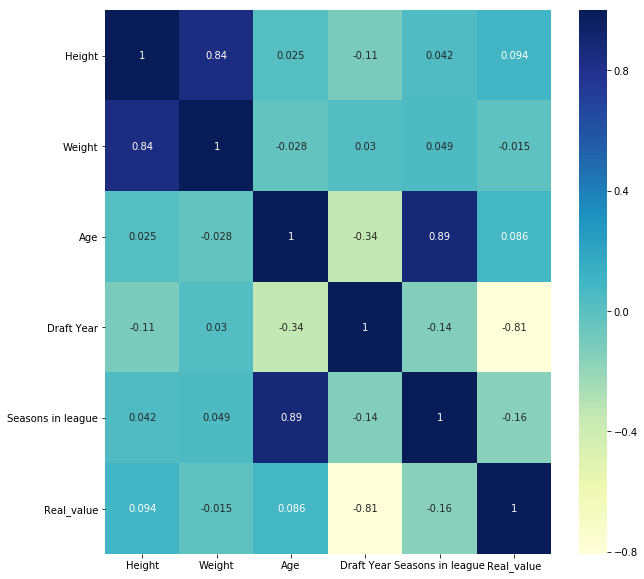

In [26]:
# Therefore drop them
plt.figure(figsize=(10,10))
matrixdf = df.drop(['Active season','Season short' ], axis=1)
sns.heatmap(matrixdf.corr(), cmap="YlGnBu",annot=True)
plt.show()

In [27]:
# df_seasons_in_league_domination = df.groupby(['Seasons in league'])['Real_value'].sum().reset_index()
# df_seasons_in_league_domination

newdf = df.groupby(['Player'])['Real_value'].sum().reset_index()

newdf.sort_values(by=['Real_value'], ascending=False)



# df_dummies = pd.get_dummies(df, columns=df.Position, drop_first=True)
# df_dummies
df1 = df.groupby(['Player']).mean().reset_index()

dfmerge = df1.merge(newdf,left_on='Player', right_on='Player')
dfmerge.head()

,Player,Active season,Height,Weight,Age,Draft Year,Seasons in league,Season short,Real_value_x,Real_value_y
0,Aaron McKie,0.0,195.58,209.0,28.000000,1994.0,6.000000,2001.000000,1.0,1.0
1,Adrian Dantley,0.0,195.58,208.0,30.000000,1976.0,9.000000,1986.000000,1.0,1.0
2,Al Harrington,0.0,205.74,245.0,29.000000,1998.0,10.000000,2009.000000,0.5,0.5
3,Al Horford,0.0,208.28,245.0,27.333333,2007.0,6.333333,2014.333333,0.5,1.5
4,Al Jefferson,0.0,208.28,289.0,26.000000,2004.0,6.000000,2011.000000,0.5,3.5


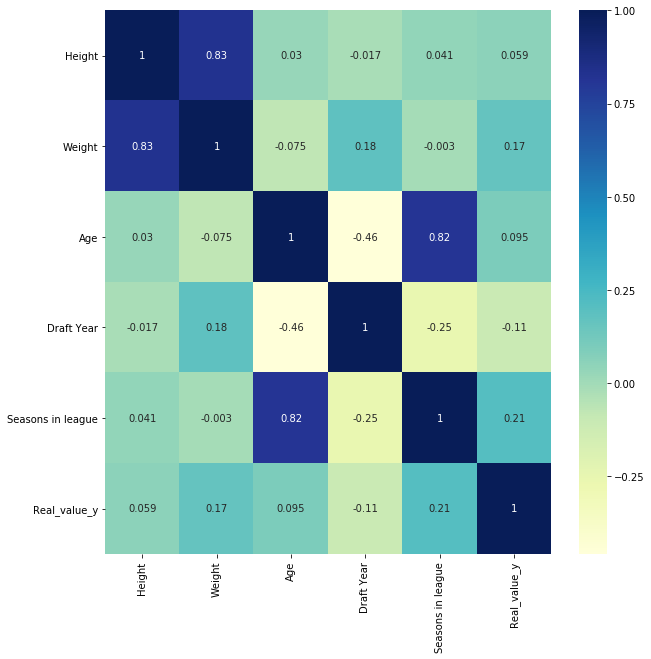

In [28]:
plt.figure(figsize=(10,10))
dfmerge = dfmerge.drop(['Active season','Season short','Real_value_x'], axis=1)
sns.heatmap(dfmerge.corr(), cmap="YlGnBu",annot=True)
plt.show()


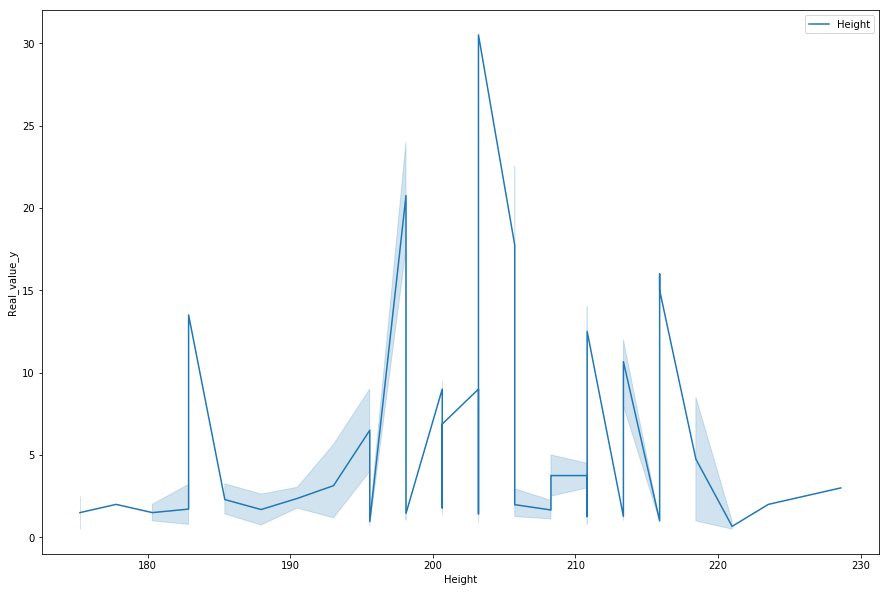

In [29]:
plt.figure(figsize=(15,10))
sns.lineplot(dfmerge['Height'],dfmerge['Real_value_y'],data=dfmerge,label='Height')
plt.show()



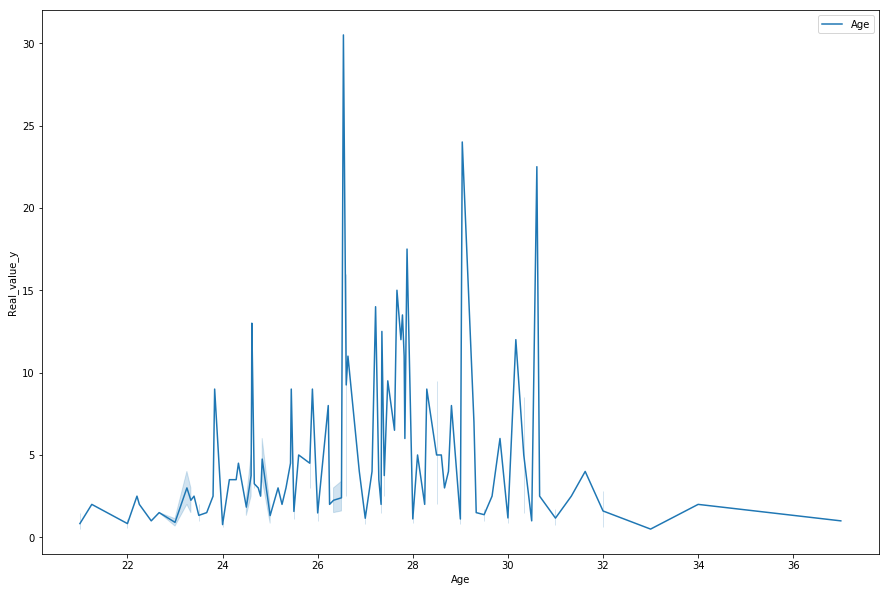

In [30]:
plt.figure(figsize=(15,10))
sns.lineplot(dfmerge['Age'],dfmerge['Real_value_y'],data=dfmerge,label='Age')
plt.show()

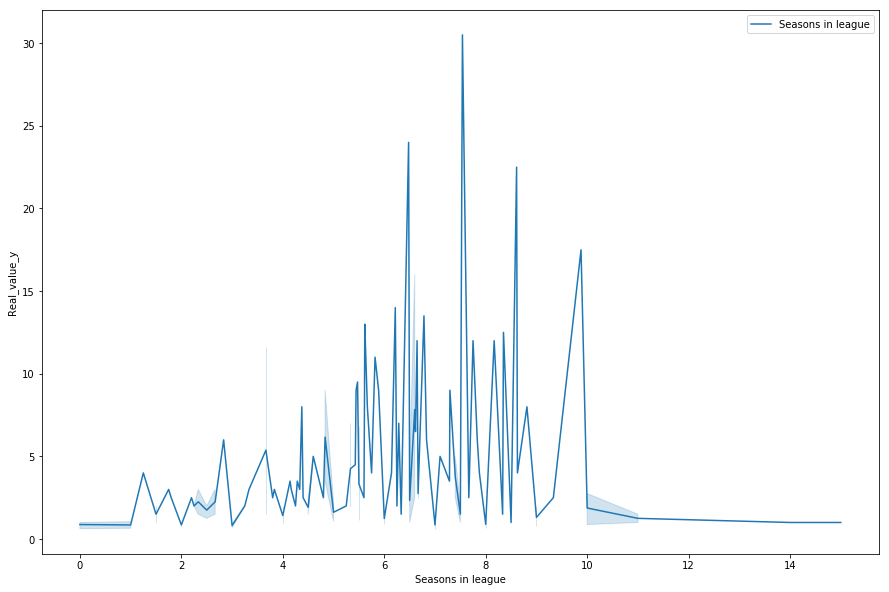

In [31]:
plt.figure(figsize=(15,10))
sns.lineplot(dfmerge['Seasons in league'],dfmerge['Real_value_y'],data=dfmerge,label='Seasons in league')
plt.show()

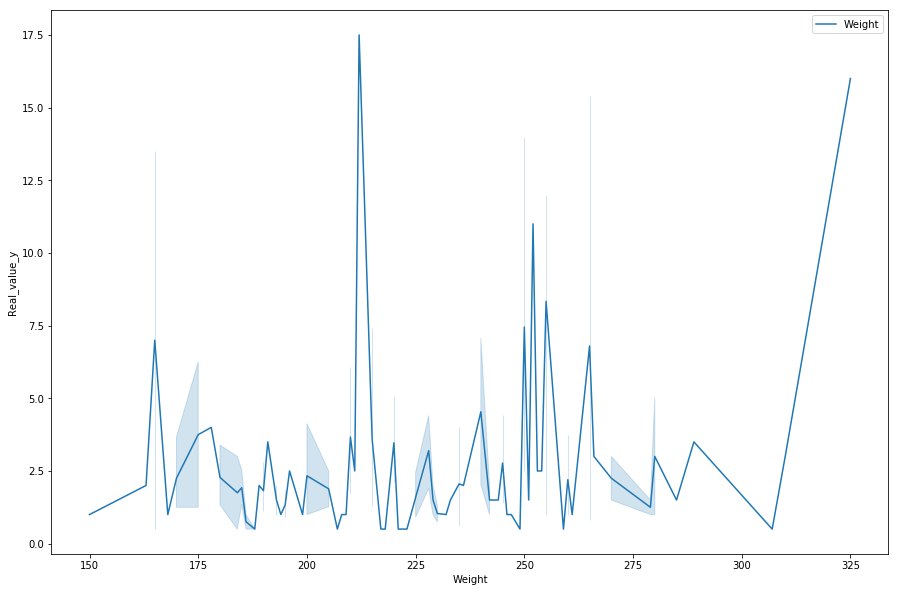

In [32]:
plt.figure(figsize=(15,10))
sns.lineplot(dfmerge['Weight'],dfmerge['Real_value_y'],data=dfmerge,label='Weight')
plt.show()

### Train and test model

In [57]:
X = dfmerge[['Height','Weight','Age','Seasons in league','Draft Year']]
y = dfmerge['Real_value_y']



In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lm = LinearRegression()

In [61]:
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

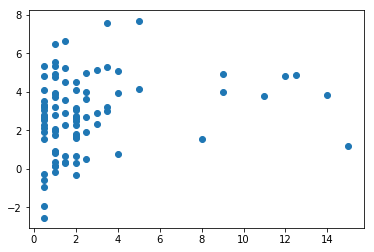

In [62]:
plt.scatter(y_test, predictions)
plt.show()

/Users/longnguyen/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


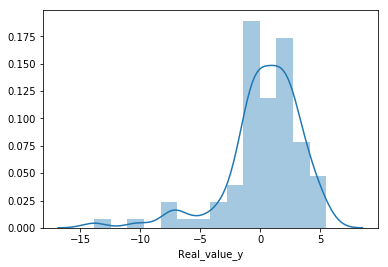

In [63]:
sns.distplot(predictions-y_test)

In [64]:
from sklearn import metrics
print('Mean Absolute Error:')
print(metrics.mean_absolute_error(y_test, predictions))
print()
print('Mean Squared Error:')
print(metrics.mean_squared_error(y_test, predictions))
print()
print('Root Mean Squared Error:')
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))



Mean Absolute Error:
2.3243563812151615

Mean Squared Error:
10.464580887368081

Root Mean Squared Error:
3.2349004447383045


### Polynomial Regression

In [65]:
from sklearn.preprocessing import PolynomialFeatures



In [66]:
pol_reg = PolynomialFeatures(degree=2)
X_train_poly = pol_reg.fit_transform(X_train)
X_test_poly = pol_reg.transform(X_test)
lm1 = LinearRegression()
lm1.fit(X_train_poly, y_train)
y_train_predict = lm1.predict(X_train_poly)
y_test_predict = lm1.predict(X_test_poly)

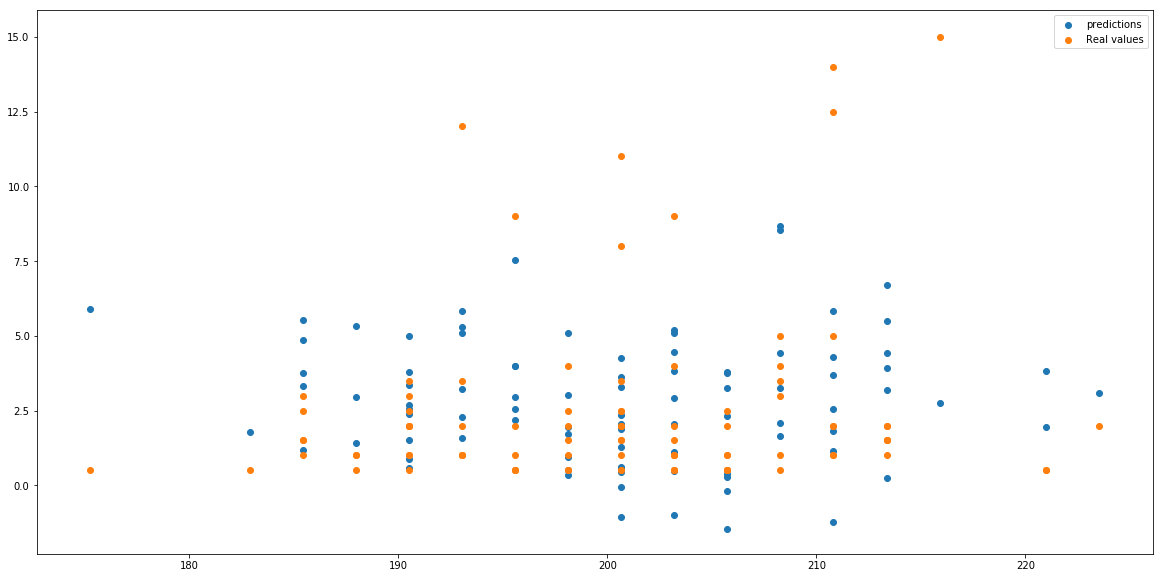

In [67]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['Height'], y_test_predict,label='predictions')
plt.scatter(X_test['Height'], y_test,label='Real values')
plt.legend()
plt.show()

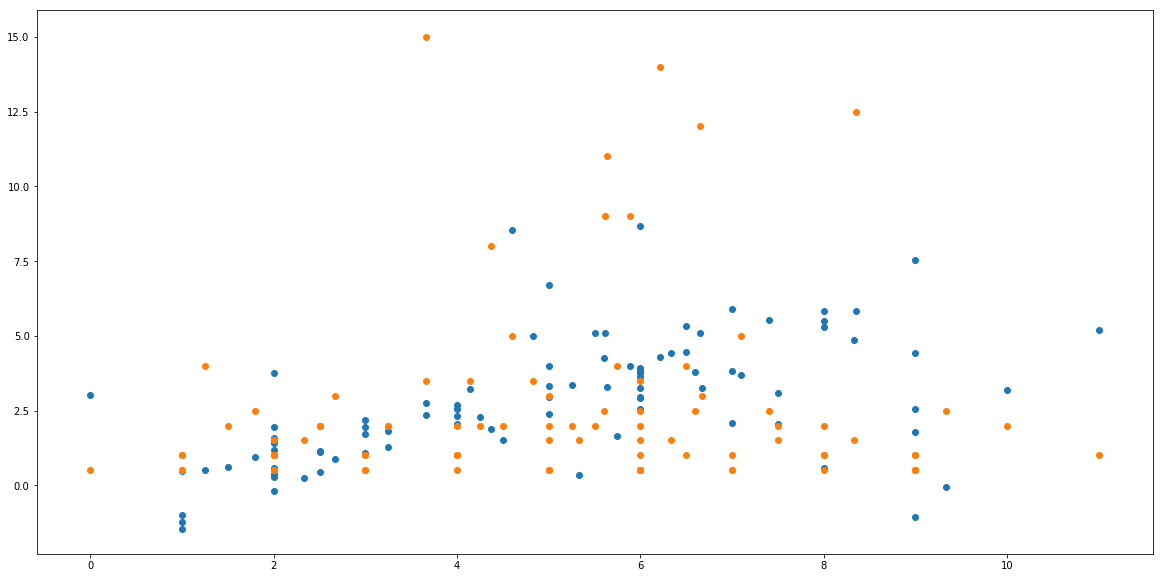

In [68]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['Seasons in league'], y_test_predict,label='predictions')
plt.scatter(X_test['Seasons in league'], y_test,label='predictions')
plt.show()

/Users/longnguyen/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


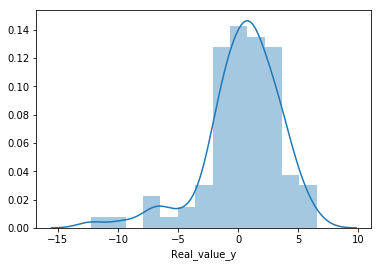

In [69]:
sns.distplot(y_test_predict-y_test)

In [70]:
from sklearn import metrics
print('Mean Absolute Error:')
print(metrics.mean_absolute_error(y_test, y_test_predict))
print()
print('Mean Squared Error:')
print(metrics.mean_squared_error(y_test, y_test_predict))
print()
print('Root Mean Squared Error:')
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

Mean Absolute Error:
2.3678942164056815

Mean Squared Error:
10.314410496024713

Root Mean Squared Error:
3.2116055947181175


### Support Vector Regression

In [71]:
from sklearn.svm import SVR
clf = SVR(kernel='rbf', C=1e1, gamma=0.1)
clf.fit(X_train, y_train)


SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [72]:
predictions = clf.predict(X_test)

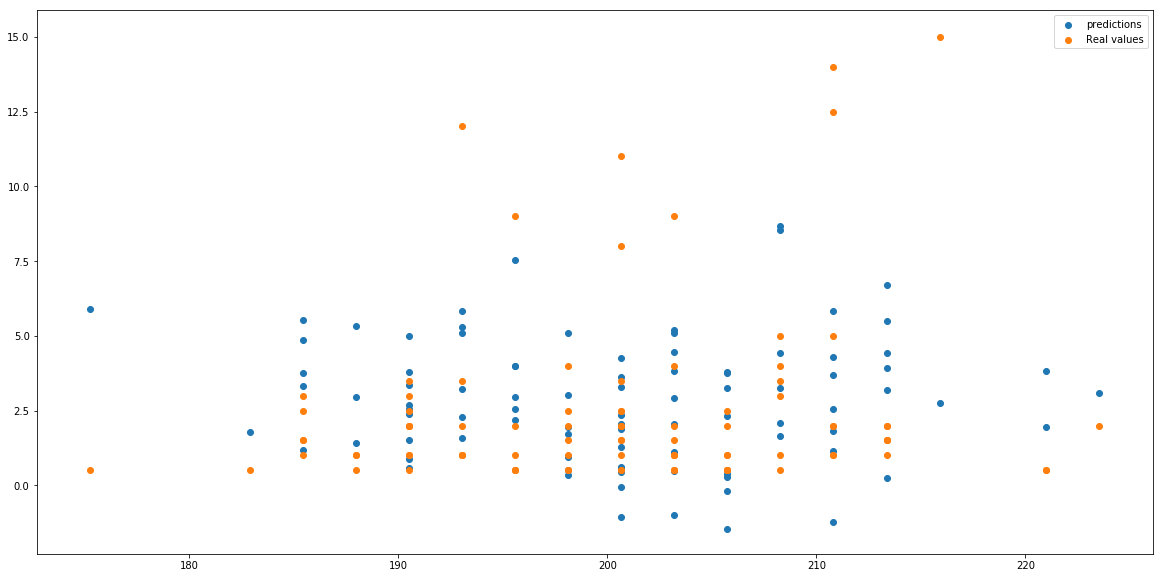

In [73]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['Height'], y_test_predict,label='predictions')
plt.scatter(X_test['Height'], y_test,label='Real values')
plt.legend()
plt.show()

/Users/longnguyen/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


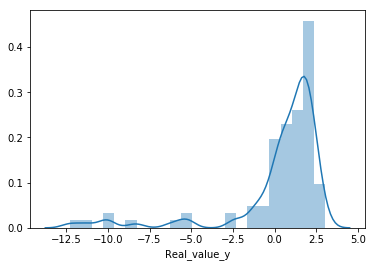

In [74]:
sns.distplot(predictions-y_test)

In [75]:
print('Mean Absolute Error:')
print(metrics.mean_absolute_error(y_test, predictions))
print()
print('Mean Squared Error:')
print(metrics.mean_squared_error(y_test, predictions))
print()
print('Root Mean Squared Error:')
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error:
2.0169938967199017

Mean Squared Error:
9.301155711178707

Root Mean Squared Error:
3.049779616821305
